In [81]:
import pandas as pd 
import numpy as np
import os

In [82]:
training_csv = pd.read_csv('C:/Users/joe/training_full_set.csv')

In [83]:
test_csv = pd.read_csv('C:/Users/joe/test_full_set.csv')

In [84]:
training_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Columns: 3765 entries, NAME to Infective-50
dtypes: float64(1525), int64(2238), object(2)
memory usage: 2.1+ MB


In [88]:
test_csv['Log S'] = 0 # adding Log S to test data with a defualt value

In [89]:
df = pd.concat((training_csv, test_csv),join='outer',axis=0, ignore_index=True) 
#concat the two data sets into one taking all columns from both data sets even if there is no value 

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Columns: 3766 entries, AAC to piPC10
dtypes: float64(1535), int64(2229), object(2)
memory usage: 3.0+ MB


In [91]:
df.head(10)

,AAC,AECC,ALOGP,ALOGP2,AMR,AMW,ARR,ATS1e,ATS1i,ATS1m,...,piPC01,piPC02,piPC03,piPC04,piPC05,piPC06,piPC07,piPC08,piPC09,piPC10
0,1.236,4.273,2.471,6.106,44.202,7.588,0.917,3.053,3.141,2.641,...,2.918,3.570,4.227,4.835,5.388,5.497,5.768,6.019,6.290,4.756
1,1.902,4.273,1.436,2.063,45.140,12.708,0.545,2.957,3.043,2.947,...,2.773,3.350,3.812,4.275,4.707,4.407,4.239,3.169,0.000,0.000
2,1.614,3.750,2.141,4.583,40.160,16.924,0.750,2.664,2.736,2.963,...,2.485,3.020,3.409,3.804,4.298,3.446,0.000,0.000,0.000,0.000
3,1.778,4.750,1.648,2.716,43.827,13.707,0.500,3.001,3.029,3.020,...,2.833,3.450,3.937,4.393,4.849,4.808,4.343,3.169,0.000,0.000
4,1.595,5.455,0.683,0.466,40.834,7.559,0.545,3.087,3.198,2.624,...,2.773,3.277,3.590,4.067,4.541,4.227,4.202,3.841,0.000,0.000
5,2.234,5.692,-1.206,1.454,48.798,11.699,0.385,3.125,3.199,3.337,...,2.970,3.618,3.869,4.358,4.523,4.790,4.523,3.944,0.000,0.000
6,1.342,8.722,2.640,6.969,74.662,6.083,0.333,3.748,3.883,3.105,...,3.135,3.512,3.866,4.289,4.717,4.547,4.604,4.684,4.555,4.428
7,1.139,3.636,1.495,2.236,45.534,5.403,0.000,3.417,3.570,2.749,...,2.639,3.091,3.332,3.761,4.007,4.111,4.007,3.892,0.000,0.000
8,1.130,7.381,4.772,22.772,92.331,6.305,0.522,3.832,3.964,3.275,...,3.434,3.989,4.570,5.146,5.692,5.896,6.295,6.641,6.951,7.199
9,1.527,10.160,4.735,22.416,103.003,7.572,0.630,3.930,4.053,3.507,...,3.597,4.220,4.814,5.412,6.016,6.269,6.612,7.069,7.458,7.582


In [92]:
df.tail(10)

,AAC,AECC,ALOGP,ALOGP2,AMR,AMW,ARR,ATS1e,ATS1i,ATS1m,...,piPC01,piPC02,piPC03,piPC04,piPC05,piPC06,piPC07,piPC08,piPC09,piPC10
96,1.354,5.500,1.235,1.524,49.687,6.121,0.500,3.340,3.482,2.706,...,2.773,3.199,3.631,4.010,4.409,3.997,4.067,3.726,2.784,0.000
97,1.647,7.842,2.821,7.957,73.710,7.511,0.316,3.698,3.796,3.451,...,3.258,3.818,4.252,4.624,5.041,5.277,5.635,4.780,4.660,4.275
98,1.603,6.941,2.751,7.565,71.542,8.291,0.667,3.499,3.638,3.140,...,3.219,3.850,4.425,5.017,5.547,5.725,5.968,6.193,6.405,6.477
99,1.505,4.000,1.167,1.362,34.511,8.633,0.600,2.904,2.964,2.530,...,2.708,3.239,3.707,4.141,4.467,4.123,3.992,3.169,0.000,0.000
100,1.871,7.722,1.068,1.141,70.573,8.811,0.632,3.523,3.628,3.432,...,3.332,3.989,4.413,4.913,5.385,5.481,5.448,5.596,5.668,5.942
101,2.023,7.588,0.778,0.606,70.654,10.014,0.611,3.440,3.530,3.501,...,3.277,3.946,4.371,4.875,5.170,5.338,5.433,5.183,5.497,5.744
102,1.226,14.543,6.498,42.229,146.065,6.207,0.474,4.374,4.503,3.777,...,3.871,4.401,4.903,5.374,5.857,5.905,6.210,6.229,6.353,6.483
103,1.648,5.643,2.155,4.642,56.363,9.584,0.938,3.213,3.310,3.088,...,3.199,3.861,4.535,5.192,5.614,6.028,6.451,6.874,6.882,6.982
104,1.702,9.056,2.336,5.457,70.270,7.511,0.333,3.644,3.758,3.410,...,3.219,3.773,4.082,4.515,4.874,4.997,4.849,4.455,4.353,3.791
105,1.618,12.000,2.419,5.851,105.955,7.748,0.207,3.981,4.112,3.597,...,3.611,4.086,4.567,5.031,5.424,5.479,5.645,5.819,5.746,5.798


# Summary Statistics 

In [93]:
df.describe()

,AAC,AECC,ALOGP,ALOGP2,AMR,AMW,ARR,ATS1e,ATS1i,ATS1m,...,piPC01,piPC02,piPC03,piPC04,piPC05,piPC06,piPC07,piPC08,piPC09,piPC10
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,...,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,1.612528,7.786566,2.387821,7.863198,74.947038,8.254123,0.476406,3.599387,3.705679,3.263255,...,3.286481,3.852472,4.342830,4.856208,5.307915,5.426198,5.565877,5.602689,5.438575,5.184792
std,0.278386,2.345178,1.477320,7.752762,22.273180,1.864590,0.183398,0.334472,0.346423,0.331107,...,0.296408,0.323729,0.378842,0.436749,0.526431,0.707509,1.036297,1.390865,2.061481,2.564168
min,1.130000,3.636000,-1.206000,0.001000,34.511000,5.403000,0.000000,2.664000,2.736000,2.530000,...,2.485000,3.020000,3.332000,3.761000,4.007000,3.446000,0.000000,0.000000,0.000000,0.000000
25%,1.408000,6.087250,1.369500,1.877000,60.887500,7.144500,0.333000,3.409250,3.517250,3.085750,...,3.135000,3.696500,4.069250,4.526750,4.868000,4.898000,4.949500,4.790500,4.630000,4.525500
50%,1.607500,7.610000,2.270000,5.153500,72.454500,7.885000,0.500000,3.606500,3.709000,3.266500,...,3.305000,3.894500,4.419000,4.942000,5.415500,5.517500,5.752500,5.960000,6.113000,6.085500
75%,1.798750,8.892250,3.501000,12.256000,89.920250,9.375750,0.600000,3.845750,3.956250,3.486750,...,3.500500,4.086000,4.597250,5.171250,5.685750,5.992250,6.316000,6.616500,6.874750,6.979250
max,2.396000,15.258000,6.498000,42.229000,146.065000,16.924000,1.000000,4.424000,4.564000,3.985000,...,3.871000,4.431000,5.061000,5.727000,6.313000,6.684000,7.210000,7.719000,7.981000,8.166000


In [94]:
%matplotlib inline

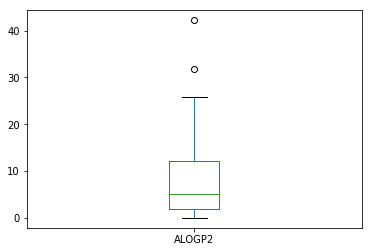

In [95]:
df.ALOGP2.plot(kind='box')

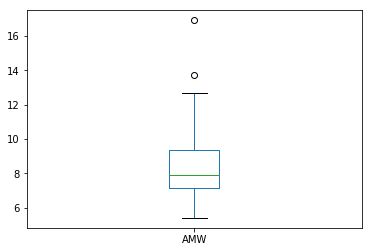

In [96]:
df.AMW.plot(kind='box')

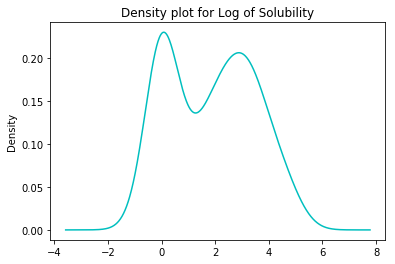

In [97]:
df = df.rename(columns={'Log S': 'Log_S'})

df.Log_S.plot(kind='kde', title='Density plot for Log of Solubility', color = 'c')

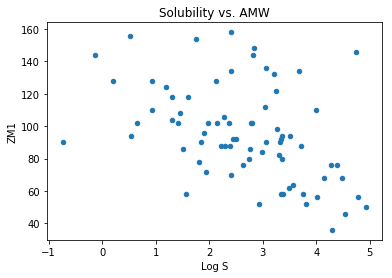

In [111]:
training_csv.plot.scatter(x='Log S', y='ZM1', title='Solubility vs. ZM1')

NameError: name 'StandardScaler' is not defined